# Notebookを介したコミュニケーション


計算機インフラの御守では種々雑多なドキュメンテーションが不可欠です。日々の作業で証跡を残す、手順を整理して共有・再利用する、ユーザマニュアルや教材を整備する.. 国立情報学研究所（NII）のクラウド運用担当では、これらをシームレスに記述・蓄積する方法を研究しています。
<img src="./images/literate_computing-logo.png" align="center" />

プロジェクトでは [Jupyter Notebook]( http://jupyter.org ) を用いてドキュメンテーションを行うことで、運用作業の信頼性向上、手順やノウハウの蓄積・流通が容易になることを目指しています。
これらの実現には、運用作業者が自身の作成したNotebookを振り返ったり、別の運用作業者がより良い解を指摘したりすることが重要になります。しかしながら、作業者の作業記録としてのNotebookは多くのコード、文章から成ります。また、それらは過去のものを流用したものである可能性もあります。これらの要素を効率よくメンテナンス・共有するために [nblineage](https://github.com/NII-cloud-operation/Jupyter-LC_nblineage) と [sidestickies](https://github.com/NII-cloud-operation/sidestickies) という2つの機能を開発・利用しています。

---
ここではNotebookを介してどうコミュニケーション行うのかを紹介します。

# 説明・コードの追跡

運用作業を構成する手順には様々なものがあります。

* 障害発生時のログの取得
* バージョンアップ時の最新ソフトウェアの取得
* ...

いずれの操作も一回きりということはあまりなく、何かイベントが発生した際に繰り返し実施する性格の操作です。
そのため、状況によりコピーされて再利用されることが多く発生します。

では、その操作に変更の必要性が出てきたらどのようにメンテナンスすれば良いでしょうか？対象システムのバージョンアップによりログファイルの
パスが変わった、アップデート方法が変わった、など... このような場合に、同じルーツを持つ説明・コード(Cell)にコメントをつけられるようにすることで、
バージョン管理の助けとなるかもしれません。

このような、Cellのルーツを追跡する仕組みとして [nblineage](https://github.com/NII-cloud-operation/Jupyter-LC_nblineage) を、nblineageにより同じルーツを持つと判断されるCellにコメントを付加するツールとして、 [sidestickies](https://github.com/NII-cloud-operation/sidestickies) というコメントツールを開発しています。

# セルへのコメント

sidestickiesを有効にするには、ツールバーの <i class='fa fa-comments'></i> トグルボタンをクリックします。

トグルをONにすると、Cell右端にふせん 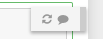 が表示されます。このふせんがCellに対するsidestickiesの入力欄です。

各Cellが作成、保存された時、nblineageによりそれぞれに固有のIDが設定されます。Cellがコピーされると、このIDがそのまま引き継がれます。つまり、CellのルーツがこのIDで識別できるわけです。このIDをnblineageではMEME(ミーム)と呼んでいます。
sidestickiesは、このMEMEを手がかりに、[Scrapbox](https://scrapbox.io)というサービス上にページを作ったり、ページを検索したりします。

試しに、以下のセルのsidestickiesのふきだしをクリックしてみてください。scrapboxの編集欄が表示されるはずです。

> 本デモのsidestickiesコメントはScrapbox https://scrapbox.io/sidestickies-public/ から参照されます。変更してみたい場合は、クラウド運用チーム(メールアドレスはイベントにてお伝えしています)にお問い合わせください。

In [1]:
print('Hello!')

Hello!


scrapboxの編集権限がある場合、編集欄でページの内容、タイトルを変更することができます。変更した場合は、ふきだし左の更新ボタンを押してみてください。最新のコメントを取得することができます。

次に、同じNotebookをダウンロードして複製を開いてみましょう。

In [2]:
!curl -L -O https://github.com/NII-cloud-operation/Jupyter-LC_docker/archive/openhouse-2019-demo.zip
!rm -fr Jupyter-LC_docker-openhouse-2019-demo/; unzip openhouse-2019-demo.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   155    0   155    0     0    670      0 --:--:-- --:--:-- --:--:--   670
100 35.0M    0 35.0M    0     0  14.7M      0 --:--:--  0:00:02 --:--:-- 18.3M
Archive:  openhouse-2019-demo.zip
4998a12171fe0a8fd9b4409317b33a06ba2c7744
   creating: Jupyter-LC_docker-openhouse-2019-demo/
  inflating: Jupyter-LC_docker-openhouse-2019-demo/.gitignore  
  inflating: Jupyter-LC_docker-openhouse-2019-demo/.travis.yml  
  inflating: Jupyter-LC_docker-openhouse-2019-demo/Dockerfile  
  inflating: Jupyter-LC_docker-openhouse-2019-demo/LICENSE  
  inflating: Jupyter-LC_docker-openhouse-2019-demo/README.md  
   creating: Jupyter-LC_docker-openhouse-2019-demo/conf/
  inflating: Jupyter-LC_docker-openhouse-2019-demo/conf/10-custom-get_ipython_system.py  
 extracting: Jupyter-LC_docker-openhouse-2019-demo/conf/ansible.cfg  
 extracting: Jupyter-LC

以下のリンクを開いてみてください。現在開いているのと同じNotebookのコピーが表示され、Hello!のセルにはscrapboxで編集した内容が現れるはずです。

[Jupyter-LC_docker-openhouse-2019-demo/sample-notebooks/03_Notebookを介したコミュニケーション.ipynb](Jupyter-LC_docker-openhouse-2019-demo/sample-notebooks/03_Notebookを介したコミュニケーション.ipynb)

# まとめ

以上のように、Notebookのコピーが増えてきた場合でも、横断的にコメントを付加できるようにすることで管理の助けとするような機能を開発しています。